<a href="https://colab.research.google.com/github/daniahmad92/Image-Classification-Model-Deployment/blob/main/Proyek_Akhir_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Diri:**

Nama : Dadan Ahmad Dani

Email : email@dadanahmaddani.com


**Submission**

Proyek Akhir : Image Classification Model Deployment

mengembangkan model ML untuk klasifikasi gambar kemudian mengkonversi model tersebut ke dalam format berkas TF-Lite yang dapat di embed di Android dan iOS

**Libarary**

In [62]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 224, 224

**Dataset**

In [63]:
train_data_dir = '/content/drive/MyDrive/DATASET/v_data/train'
validation_data_dir = '/content/drive/MyDrive/DATASET/v_data/test'

epochs = 10
batch_size = 16

**Data Train dan Evaluasi**

In [64]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

In [66]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


**Pemodelan**

In [67]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [68]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])

**Latih Model (menggunakan Callback)**

In [69]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [70]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    verbose =1,
    callbacks=[callbacks]
)

Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 0.7628 - accuracy: 0.6425 - val_loss: 0.8266 - val_accuracy: 0.6300
Epoch 2/10
25/25 [==============================] - 22s 886ms/step - loss: 0.5032 - accuracy: 0.7675 - val_loss: 0.2293 - val_accuracy: 0.9100
Epoch 3/10
25/25 [==============================] - 23s 919ms/step - loss: 0.4422 - accuracy: 0.8050 - val_loss: 0.2462 - val_accuracy: 0.9100
Epoch 4/10
25/25 [==============================] - 22s 889ms/step - loss: 0.4101 - accuracy: 0.8150 - val_loss: 0.3437 - val_accuracy: 0.8300
Epoch 5/10
25/25 [==============================] - 22s 886ms/step - loss: 0.3478 - accuracy: 0.8575 - val_loss: 0.5673 - val_accuracy: 0.7300
Epoch 6/10
25/25 [==============================] - 22s 886ms/step - loss: 0.3350 - accuracy: 0.8425 - val_loss: 0.2784 - val_accuracy: 0.8900
Epoch 7/10
25/25 [==============================] - 22s 887ms/step - loss: 0.3073 - accuracy: 0.8600 - val_loss: 0.2905 - val_accuracy: 0.8700
Ep

**Plot Accuracy dan Loss**

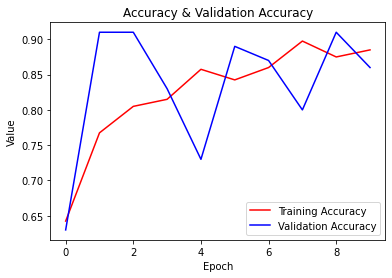

In [81]:
import matplotlib.pyplot as plt

# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

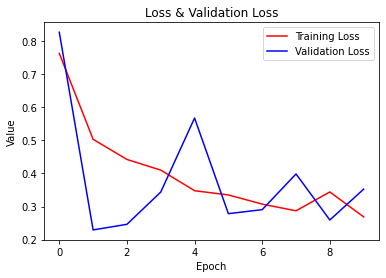

In [82]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

**menyimpan model ke dalam format TF-Lite**

In [83]:
# Menyimpan model dalam format SavedModel
import pathlib
export_dir = 'file_export/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('notebook.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: file_export/assets


INFO:tensorflow:Assets written to: file_export/assets


11999404